In [2]:
%pip install pandas_profiling ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

In [1]:
%pip install scipy

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/Users/juanpablo/.local/share/virtualenvs/AI-Recommendation-Algorithm-U6vCx7TH/lib/python3.10/site-packages/numpy-1.24.2.dist-info/METADATA'


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import random
# import matplotlib.pyplot as plt

records = []

# Generate the data
for i in range(50000):
    hrv = random.randint(60, 105)
    if i % 300 == 0:  # every 300 iterations
        pain = random.randint(0, 10)
    else:
        pain = 10 - ((hrv - 60) / 6 + random.randint(0, 3))
    record = {
        'hrv': hrv,
        'pain': pain,
    }
    records.append(record)
        
df = pd.DataFrame(records)

# Remove outliers
Q1 = df['hrv'].quantile(0.25)
Q3 = df['hrv'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['hrv'] >= Q1 - 1.5*IQR) & (df['hrv'] <= Q3 + 1.5*IQR)]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hrv     50000 non-null  int64  
 1   pain    50000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [5]:
df[[ 'pain']] = df[['pain']].astype('int64')

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Use pandas to remove outliers and get HRV ranges for each pain level
data = df.groupby('pain').apply(lambda x: x[(x['hrv'] >= x['hrv'].quantile(.10)) & 
                                                     (x['hrv'] <= x['hrv'].quantile(.90))])

# Calculate the correlation between HRV and pain levels
corr, _ = pearsonr(data['hrv'], data['pain'])

# Identify the HRV range with the strongest correlation to reduced pain levels
data.set_index('pain', inplace=True)
optimal_hrv_range = data.groupby('pain')['hrv'].agg(lambda x: np.percentile(x, 50)).reset_index()

# Print results
print('Correlation between HRV and pain levels: %.2f' % corr)
print('Optimal HRV range for pain reduction:\n%s' % optimal_hrv_range)


Correlation between HRV and pain levels: -0.92
Optimal HRV range for pain reduction:
    pain    hrv
0      0  103.0
1      1   98.0
2      2   95.0
3      3   90.0
4      4   84.0
5      5   78.0
6      6   73.0
7      7   69.0
8      8   66.0
9      9   63.0
10    10   60.0


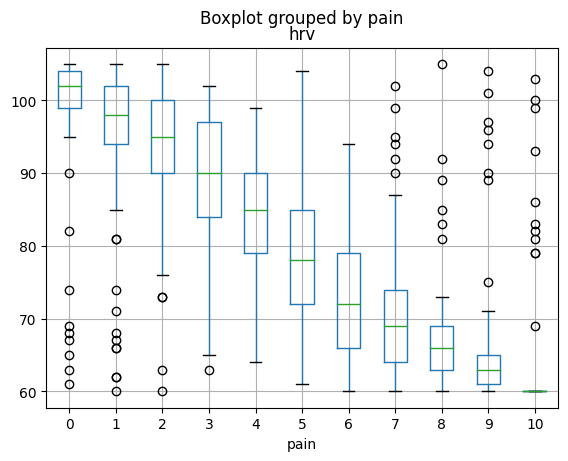

In [6]:
df.boxplot(column=['hrv'], by='pain')
plt.show()